In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from scipy import stats

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


Saving historical_data.csv to historical_data.csv


In [4]:
df_trader = pd.read_csv('historical_data.csv')
df_trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
df_sentiment = pd.read_csv('fear_greed_index.csv')
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
print("\n" + "=" * 80)
print("TRADER DATA - INITIAL EXPLORATION")
print("=" * 80)

if df_trader is not None:
    print("\nFirst 5 rows:")
    display(df_trader.head())

    print("\nData Info:")
    print(df_trader.info())

    print("\nBasic Statistics:")
    display(df_trader.describe())

    print("\nMissing Values:")
    missing = df_trader.isnull().sum()
    print(missing[missing > 0])

    print("\nUnique Values per Column:")
    for col in df_trader.columns:
        print(f"{col}: {df_trader[col].nunique():,} unique values")

print("\n" + "=" * 80)
print("SENTIMENT DATA - INITIAL EXPLORATION")
print("=" * 80)

if df_sentiment is not None:
    print("\nFirst 5 rows:")
    display(df_sentiment.head())

    print("\nData Info:")
    print(df_sentiment.info())

    print("\nColumn names in sentiment data:")
    print(df_sentiment.columns.tolist())

    # Check for sentiment column (might be named differently)
    sentiment_col = None
    possible_names = ['Classification', 'classification', 'Sentiment', 'sentiment',
                      'Class', 'class', 'Type', 'type', 'Category', 'category']

    for col_name in possible_names:
        if col_name in df_sentiment.columns:
            sentiment_col = col_name
            break

    if sentiment_col:
        print(f"\n✓ Found sentiment column: '{sentiment_col}'")
        print("\nSentiment Distribution:")
        print(df_sentiment[sentiment_col].value_counts())
    else:
        print("\n⚠ WARNING: Could not find sentiment column!")
        print("Please check the column name and update the code accordingly.")



TRADER DATA - INITIAL EXPLORATION

First 5 rows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12



Missing Values:
Series([], dtype: int64)

Unique Values per Column:
Account: 32 unique values
Coin: 246 unique values
Execution Price: 60,162 unique values
Size Tokens: 59,304 unique values
Size USD: 118,493 unique values
Side: 2 unique values
Timestamp IST: 27,977 unique values
Start Position: 196,923 unique values
Direction: 12 unique values
Closed PnL: 90,720 unique values
Transaction Hash: 101,184 unique values
Order ID: 50,555 unique values
Crossed: 2 unique values
Fee: 138,802 unique values
Trade ID: 2,810 unique values
Timestamp: 7 unique values

SENTIMENT DATA - INITIAL EXPLORATION

First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Column names in sentiment data:
['timestamp', 'value', 'classification', 'date']

✓ Found sentiment column: 'classification'

Sentiment Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [12]:
df_trader = df_trader.rename(columns={
        'Account': 'account',
        'Coin': 'symbol',
        'Execution Price': 'execution_price',
        'Size Tokens': 'size',
        'Size USD': 'size_usd',
        'Side': 'side',
        'Timestamp IST': 'time',
        'Start Position': 'start_position',
        'Direction': 'direction',
        'Closed PnL': 'closedPnL',
        'Transaction Hash': 'tx_hash',
        'Order ID': 'order_id',
        'Crossed': 'crossed',
        'Fee': 'fee',
        'Trade ID': 'trade_id',
        'Timestamp': 'timestamp_unix'
    })


In [17]:
print("\n" + "=" * 80)
print("DATA CLEANING & PREPROCESSING")
print("=" * 80)

if df_trader is not None:
    # Print actual column names
    print("Trader data columns:")
    print(df_trader.columns.tolist())

    # Map common column name variations
    column_mapping = {
        'Account': 'account',
        'account': 'account',
        'Timestamp': 'time',
        'timestamp': 'time',
        'Timestamp IST': 'time',
        'Time': 'time',
        'Execution Price': 'execution price',
        'execution_price': 'execution price',
        'Price': 'execution price',
        'Size Tokens': 'size',
        'Size': 'size',
        'size': 'size',
        'Side': 'side',
        'side': 'side',
        'Direction': 'side',
        'Closed PnL': 'closedPnL',
        'closedPnL': 'closedPnL',
        'PnL': 'closedPnL',
        'pnl': 'closedPnL',
        'Coin': 'symbol',
        'Symbol': 'symbol',
        'symbol': 'symbol'
    }

    # Rename columns to standardized names
    df_trader = df_trader.rename(columns=column_mapping)

    print("\nStandardized columns:")
    print(df_trader.columns.tolist())

    # Convert time column to datetime
    if 'time' in df_trader.columns:
        df_trader['time'] = pd.to_datetime(df_trader['time'], errors='coerce')
        df_trader['date'] = df_trader['time'].dt.date
        print(f"✓ Time column converted to datetime")
    elif 'Timestamp' in df_trader.columns:
        df_trader['time'] = pd.to_datetime(df_trader['Timestamp'], errors='coerce')
        df_trader['date'] = df_trader['time'].dt.date
        print(f"✓ Timestamp column converted to datetime")

    # Handle missing values
    print(f"\nRows before cleaning: {len(df_trader):,}")
    df_trader_clean = df_trader.dropna(subset=['time'])
    print(f"Rows after removing null timestamps: {len(df_trader_clean):,}")

    # Convert numeric columns
    numeric_cols = ['execution price', 'size', 'closedPnL']
    for col in numeric_cols:
        if col in df_trader_clean.columns:
            df_trader_clean[col] = pd.to_numeric(df_trader_clean[col], errors='coerce')

    # Handle leverage column if it exists
    if 'leverage' not in df_trader_clean.columns:
        print("\n⚠ 'leverage' column not found - creating synthetic leverage column")
        df_trader_clean['leverage'] = 1.0  # Default to 1x if not available
    else:
        df_trader_clean['leverage'] = pd.to_numeric(df_trader_clean['leverage'], errors='coerce')

    print(f"✓ Numeric columns converted")

    if df_sentiment is not None:
    # Print actual column names
      print("\nSentiment data columns:")
    print(df_sentiment.columns.tolist())

    # Find date column
    date_col = None
    for col in ['Date', 'date', 'Timestamp', 'timestamp', 'Time', 'time']:
        if col in df_sentiment.columns:
            date_col = col
            break

    # Find sentiment column
    sentiment_col = None
    for col in ['Classification', 'classification', 'Sentiment', 'sentiment',
                'Class', 'class', 'Type', 'type', 'Category', 'category']:
        if col in df_sentiment.columns:
            sentiment_col = col
            break

    if date_col and sentiment_col:
        # Convert date column
        df_sentiment[date_col] = pd.to_datetime(df_sentiment[date_col], errors='coerce')
        df_sentiment['date'] = df_sentiment[date_col].dt.date

        # Standardize sentiment column name
        if sentiment_col != 'Classification':
            df_sentiment['Classification'] = df_sentiment[sentiment_col]

        print(f"✓ Date column: '{date_col}' converted")
        print(f"✓ Sentiment column: '{sentiment_col}' found and standardized")
        print(f"\nSentiment data date range: {df_sentiment[date_col].min()} to {df_sentiment[date_col].max()}")
    else:
        print(f"\n⚠ WARNING: Could not find date or sentiment columns!")
        print(f"Date column found: {date_col}")
        print(f"Sentiment column found: {sentiment_col}")

if df_trader is not None:
    print(f"\nTrader data date range: {df_trader_clean['time'].min()} to {df_trader_clean['time'].max()}")




DATA CLEANING & PREPROCESSING
Trader data columns:
['account', 'symbol', 'execution price', 'size', 'size_usd', 'side', 'time', 'start_position', 'direction', 'closedPnL', 'tx_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_unix', 'date']

Standardized columns:
['account', 'symbol', 'execution price', 'size', 'size_usd', 'side', 'time', 'start_position', 'direction', 'closedPnL', 'tx_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_unix', 'date']
✓ Time column converted to datetime

Rows before cleaning: 211,224
Rows after removing null timestamps: 79,225

⚠ 'leverage' column not found - creating synthetic leverage column
✓ Numeric columns converted

Sentiment data columns:
['timestamp', 'value', 'classification', 'date', 'Classification']
✓ Date column: 'date' converted
✓ Sentiment column: 'Classification' found and standardized

Sentiment data date range: 2018-02-01 to 2025-05-02

Trader data date range: 2023-01-05 01:06:00 to 2025-12-04 23:55:00


/tmp/ipython-input-176708831.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trader_clean[col] = pd.to_numeric(df_trader_clean[col], errors='coerce')
/tmp/ipython-input-176708831.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trader_clean['leverage'] = 1.0  # Default to 1x if not available


In [18]:
print("\n" + "=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

if df_trader is not None and df_sentiment is not None:
    # Merge datasets on date
    df_merged = df_trader_clean.merge(
        df_sentiment[['date', 'Classification']],
        on='date',
        how='left'
    )
    print(f"✓ Datasets merged: {len(df_merged):,} rows")
    print(f"  Rows with sentiment data: {df_merged['Classification'].notna().sum():,}")
    print(f"  Rows without sentiment: {df_merged['Classification'].isna().sum():,}")

    # Create additional features
    df_merged['hour'] = df_merged['time'].dt.hour
    df_merged['day_of_week'] = df_merged['time'].dt.dayofweek
    df_merged['is_long'] = (df_merged['side'] == 'long').astype(int) if 'side' in df_merged.columns else 0
    df_merged['trade_value'] = df_merged['execution price'] * df_merged['size']

    # Calculate profitable trades
    if 'closedPnL' in df_merged.columns:
        df_merged['is_profitable'] = (df_merged['closedPnL'] > 0).astype(int)
        df_merged['is_loss'] = (df_merged['closedPnL'] < 0).astype(int)

    print(f"✓ Additional features created")

    # Save cleaned data
    df_merged.to_csv('merged_data.csv', index=False)
    print(f"✓ Merged data saved to 'merged_data.csv'")



FEATURE ENGINEERING
✓ Datasets merged: 79,225 rows
  Rows with sentiment data: 35,864
  Rows without sentiment: 43,361
✓ Additional features created
✓ Merged data saved to 'merged_data.csv'



EXPLORATORY DATA ANALYSIS
✓ EDA overview plot saved: 'eda_overview.png'


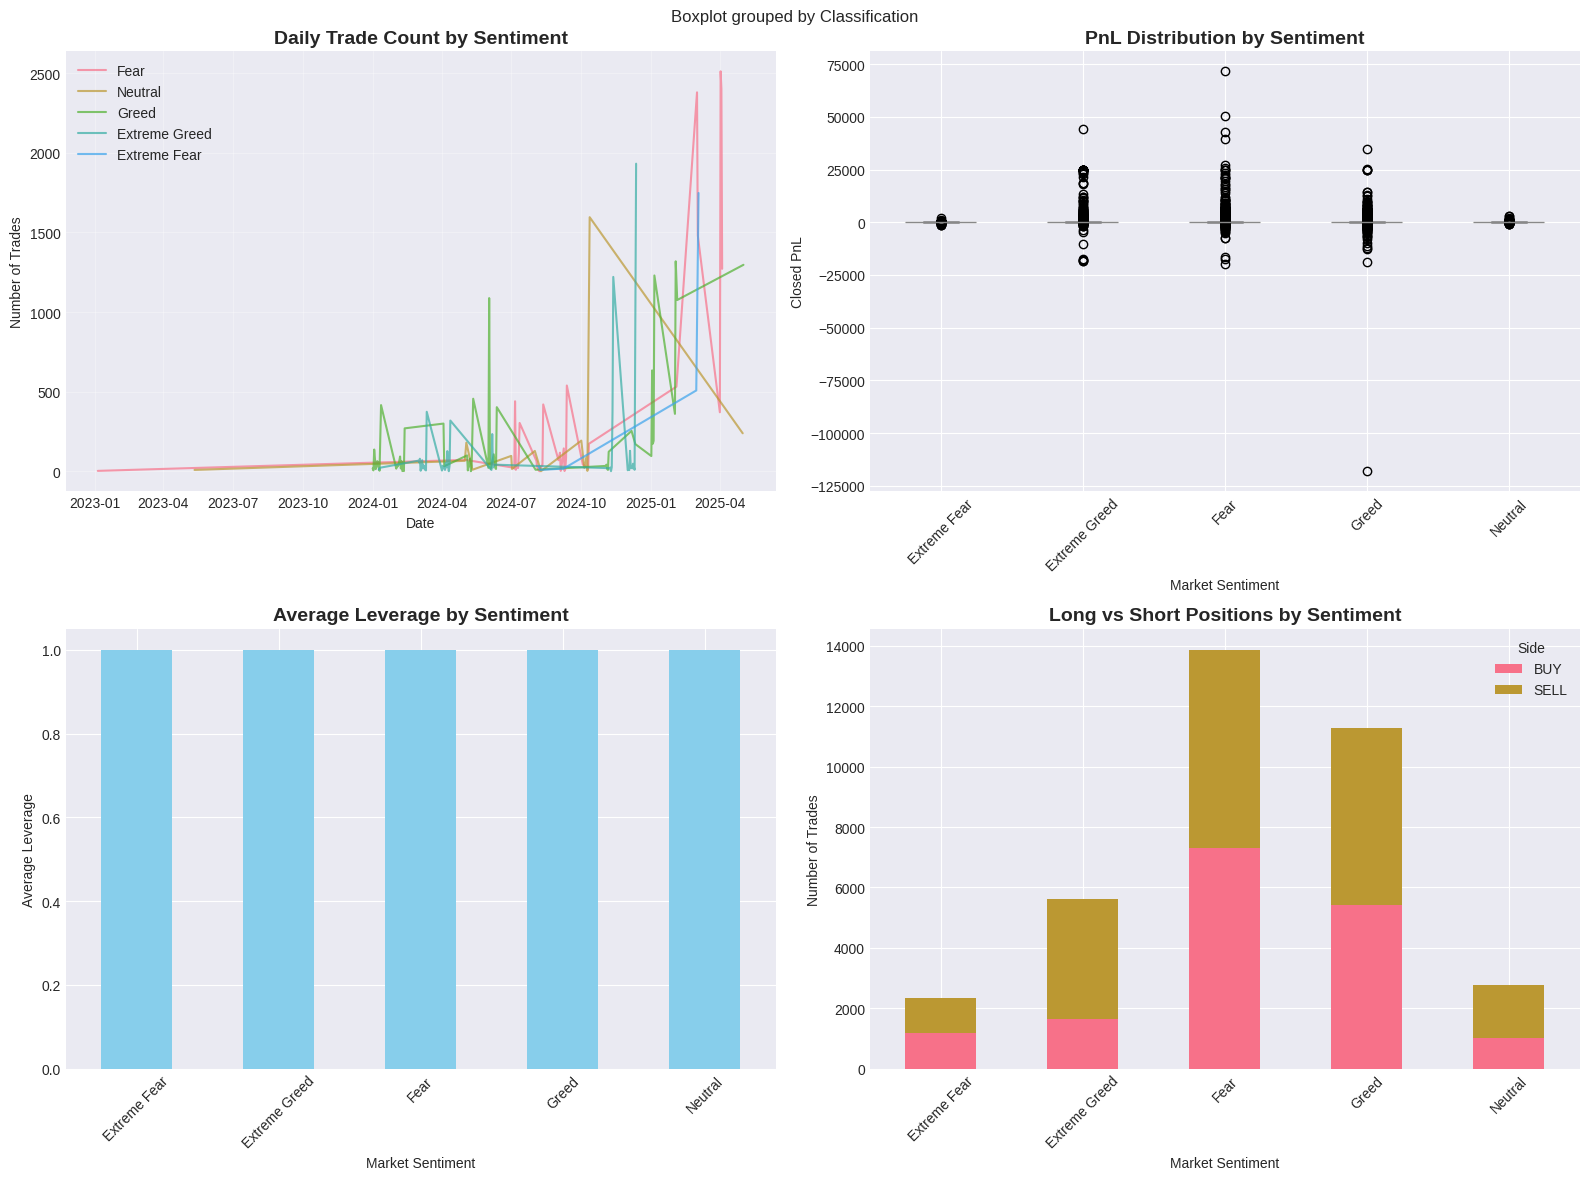

In [19]:
print("\n" + "=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

if 'df_merged' in locals():
    # 5.1 Trading Volume by Sentiment
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Daily trade count by sentiment
    daily_counts = df_merged.groupby(['date', 'Classification']).size().reset_index(name='count')
    for sentiment in daily_counts['Classification'].unique():
        if pd.notna(sentiment):
            data = daily_counts[daily_counts['Classification'] == sentiment]
            axes[0, 0].plot(data['date'], data['count'], label=sentiment, alpha=0.7)
    axes[0, 0].set_title('Daily Trade Count by Sentiment', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Number of Trades')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: PnL distribution by sentiment
    if 'closedPnL' in df_merged.columns:
        df_pnl = df_merged[df_merged['Classification'].notna() & df_merged['closedPnL'].notna()]
        df_pnl.boxplot(column='closedPnL', by='Classification', ax=axes[0, 1])
        axes[0, 1].set_title('PnL Distribution by Sentiment', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Market Sentiment')
        axes[0, 1].set_ylabel('Closed PnL')
        plt.sca(axes[0, 1])
        plt.xticks(rotation=45)

    # Plot 3: Leverage usage by sentiment
    if 'leverage' in df_merged.columns:
        leverage_data = df_merged[df_merged['Classification'].notna() & df_merged['leverage'].notna()]
        leverage_by_sentiment = leverage_data.groupby('Classification')['leverage'].mean()
        leverage_by_sentiment.plot(kind='bar', ax=axes[1, 0], color='skyblue')
        axes[1, 0].set_title('Average Leverage by Sentiment', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Market Sentiment')
        axes[1, 0].set_ylabel('Average Leverage')
        axes[1, 0].tick_params(axis='x', rotation=45)

    # Plot 4: Long vs Short ratio by sentiment
    if 'side' in df_merged.columns:
        side_sentiment = df_merged[df_merged['Classification'].notna()].groupby(['Classification', 'side']).size().unstack(fill_value=0)
        side_sentiment.plot(kind='bar', stacked=True, ax=axes[1, 1])
        axes[1, 1].set_title('Long vs Short Positions by Sentiment', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Market Sentiment')
        axes[1, 1].set_ylabel('Number of Trades')
        axes[1, 1].legend(title='Side')
        axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('eda_overview.png', dpi=300, bbox_inches='tight')
    print("✓ EDA overview plot saved: 'eda_overview.png'")
    plt.show()


In [22]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import pandas as pd

print("\n" + "=" * 80)
print("STATISTICAL ANALYSIS")
print("=" * 80)

if 'df_merged' in locals() and 'closedPnL' in df_merged.columns:
    # Filter valid data
    df_valid = df_merged[df_merged['Classification'].notna() & df_merged['closedPnL'].notna()]

    if not df_valid.empty:
        # Group by sentiment
        sentiment_groups = df_valid.groupby('Classification')

        print("\nPnL Statistics by Sentiment:")
        print("-" * 60)
        pnl_stats = sentiment_groups['closedPnL'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
        display(pnl_stats)

        # Prepare groups for ANOVA
        sentiment_categories = df_valid['Classification'].unique()
        if len(sentiment_categories) >= 2:
            groups = [df_valid.loc[df_valid['Classification'] == cat, 'closedPnL'] for cat in sentiment_categories]

            # Run one-way ANOVA
            f_stat, p_value = stats.f_oneway(*groups)
            print(f"\nANOVA Test Results:")
            print(f"F-statistic: {f_stat:.4f}")
            print(f"P-value: {p_value:.6f}")

            if p_value < 0.05:
                print("✓ Significant difference in PnL across sentiment categories (p < 0.05)")

                # --- Post-hoc test (Tukey’s HSD) ---
                tukey = pairwise_tukeyhsd(endog=df_valid['closedPnL'],
                                          groups=df_valid['Classification'],
                                          alpha=0.05)
                print("\nPost-hoc Analysis (Tukey HSD):")
                print(tukey.summary())

                # --- Effect size (eta squared) ---
                ss_between = sum(df_valid.groupby('Classification')['closedPnL'].mean()
                                 .sub(df_valid['closedPnL'].mean())**2
                                 * df_valid.groupby('Classification').size())
                ss_total = sum((df_valid['closedPnL'] - df_valid['closedPnL'].mean())**2)
                eta_sq = ss_between / ss_total if ss_total != 0 else np.nan

                print(f"\nEffect Size (η²): {eta_sq:.3f}")
                if eta_sq < 0.01:
                    print("→ Small effect")
                elif eta_sq < 0.06:
                    print("→ Medium effect")
                else:
                    print("→ Large effect")
            else:
                print("✗ No significant difference in PnL across sentiment categories (p >= 0.05)")
        else:
            print("\n⚠ Not enough sentiment categories for ANOVA.")
    else:
        print("\n⚠ No valid PnL or sentiment data available for analysis.")
else:
    print("\n⚠ 'df_merged' not found or missing 'closedPnL' column.")



STATISTICAL ANALYSIS

PnL Statistics by Sentiment:
------------------------------------------------------------


,count,mean,median,std,min,max
Classification,,,,,,
Extreme Fear,2326,1.891632,0.00000,76.727713,-1430.889856,2020.000000
Extreme Greed,5621,205.816345,0.96048,1861.557119,-18360.670070,44223.451870
Fear,13869,128.287950,0.00000,1342.348497,-19841.240140,71535.716740
Greed,11292,53.988003,0.00000,1399.468182,-117990.104100,34903.817100
Neutral,2756,27.088803,0.00000,142.945889,-1032.981540,2979.554311



ANOVA Test Results:
F-statistic: 18.1509
P-value: 0.000000
✓ Significant difference in PnL across sentiment categories (p < 0.05)

Post-hoc Analysis (Tukey HSD):
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
 Extreme Fear Extreme Greed  203.9247    0.0  112.2363 295.6131   True
 Extreme Fear          Fear  126.3963 0.0003    43.069 209.7236   True
 Extreme Fear         Greed   52.0964 0.4475  -32.5856 136.7783  False
 Extreme Fear       Neutral   25.1972 0.9655   -79.515 129.9094  False
Extreme Greed          Fear  -77.5284  0.003 -136.3316 -18.7252   True
Extreme Greed         Greed -151.8283    0.0 -212.5359 -91.1208   True
Extreme Greed       Neutral -178.7275    0.0 -265.2088 -92.2462   True
         Fear         Greed  -74.2999 0.0002 -121.4389  -27.161   True
         Fear       Neutral -101.1991 0.0034 -178.7601 -

/tmp/ipython-input-2247039170.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classification', y='closedPnL', data=df_valid, hue=None, palette="Set2", order=sentiment_order, legend=False)


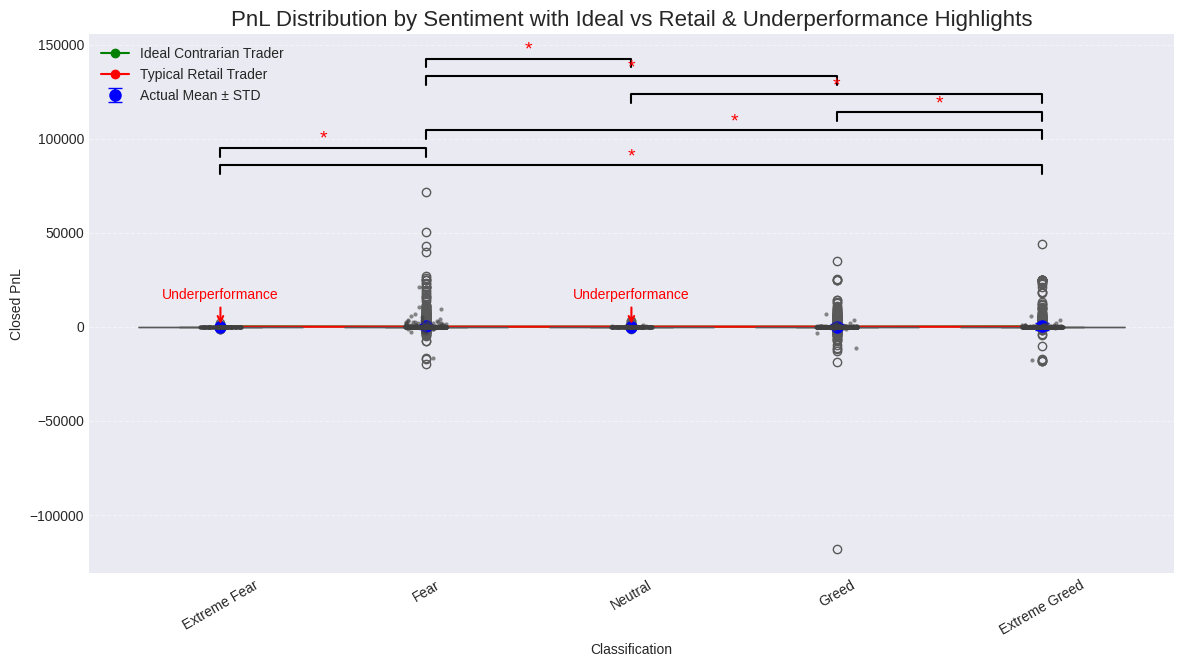

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sentiment order
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
MAX_POINTS = 2000  # Subsample limit

if 'df_valid' in locals() and not df_valid.empty:

    # --- Calculate mean and std ---
    pnl_stats = df_valid.groupby('Classification')['closedPnL'].agg(['mean', 'std']).reindex(sentiment_order)
    actual_mean = pnl_stats['mean']
    actual_std = pnl_stats['std']

    # --- Ideal & Retail PnL ---
    ideal_pnl = [max(actual_mean)*1.0 if s in ['Extreme Fear','Extreme Greed'] else actual_mean.median() for s in sentiment_order]
    retail_pnl = [min(actual_mean)*0.5 if s in ['Extreme Fear','Extreme Greed'] else actual_mean.median()*0.8 for s in sentiment_order]

    # --- Subsample if needed ---
    plot_data = df_valid.sample(MAX_POINTS, random_state=42) if len(df_valid) > MAX_POINTS else df_valid.copy()

    # --- Boxplot + Swarm/Strip ---
    plt.figure(figsize=(14,7))
    sns.boxplot(x='Classification', y='closedPnL', data=df_valid, hue=None, palette="Set2", order=sentiment_order, legend=False)

    if len(df_valid) > 5000:
        sns.stripplot(x='Classification', y='closedPnL', data=plot_data, hue=None, color=".25", alpha=0.6, size=3, order=sentiment_order)
    else:
        sns.swarmplot(x='Classification', y='closedPnL', data=plot_data, hue=None, color=".25", alpha=0.6, size=3, order=sentiment_order)

    # --- Plot mean ± std, ideal & retail ---
    plt.errorbar(np.arange(len(sentiment_order)), actual_mean.values, yerr=actual_std.values,
                 fmt='o', color='blue', label='Actual Mean ± STD', capsize=5, markersize=8)
    plt.plot(sentiment_order, ideal_pnl, marker='o', color='green', label='Ideal Contrarian Trader')
    plt.plot(sentiment_order, retail_pnl, marker='o', color='red', label='Typical Retail Trader')

    # --- Tukey annotations ---
    sig_pairs = [
        ('Extreme Fear', 'Extreme Greed'),
        ('Extreme Fear', 'Fear'),
        ('Extreme Greed', 'Fear'),
        ('Extreme Greed', 'Greed'),
        ('Extreme Greed', 'Neutral'),
        ('Fear', 'Greed'),
        ('Fear', 'Neutral')
    ]
    y_max = df_valid['closedPnL'].max()
    y_min = df_valid['closedPnL'].min()
    y_offset = (y_max - y_min) * 0.05
    for idx, (g1, g2) in enumerate(sig_pairs):
        x1, x2 = sentiment_order.index(g1), sentiment_order.index(g2)
        y = y_max + y_offset*(idx+1)
        plt.plot([x1, x1, x2, x2], [y, y + y_offset/2, y + y_offset/2, y], lw=1.5, c='k')
        plt.text((x1+x2)/2, y + y_offset/2, "*", ha='center', va='bottom', color='red', fontsize=14)

    # --- Underperformance arrows ---
    for i in range(len(sentiment_order)):
        if actual_mean.iloc[i] < ideal_pnl[i]:
            plt.annotate('Underperformance',
                         xy=(i, actual_mean.iloc[i]), xycoords='data',
                         xytext=(0, 20), textcoords='offset points',
                         ha='center', color='red', fontsize=10,
                         arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

    plt.xticks(rotation=30)
    plt.ylabel("Closed PnL")
    plt.title("PnL Distribution by Sentiment with Ideal vs Retail & Underperformance Highlights", fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()


/tmp/ipython-input-3588015824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Classification', y='closedPnL', data=df_valid, palette="Set2",


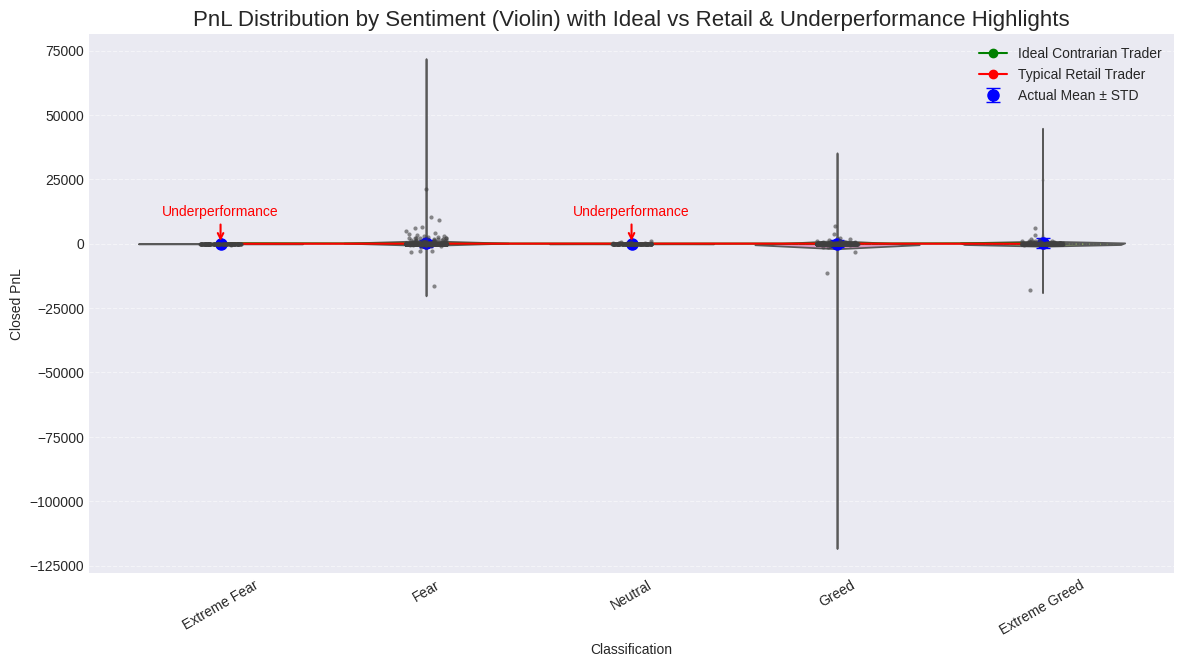

In [26]:
# --- Violin Plot with Warning-Free Setup ---
plt.figure(figsize=(14,7))

# Violin plot
sns.violinplot(x='Classification', y='closedPnL', data=df_valid, palette="Set2",
               inner="quartile", order=sentiment_order, hue=None)

# Subsample for stripplot if large dataset
if len(df_valid) > 5000:
    plot_data = df_valid.sample(MAX_POINTS, random_state=42)
    sns.stripplot(x='Classification', y='closedPnL', data=plot_data, hue=None,
                  color=".25", alpha=0.6, size=3, order=sentiment_order)
else:
    sns.swarmplot(x='Classification', y='closedPnL', data=df_valid, hue=None,
                  color=".25", alpha=0.6, size=3, order=sentiment_order)

# Plot actual mean ± std
plt.errorbar(np.arange(len(sentiment_order)), actual_mean.values, yerr=actual_std.values,
             fmt='o', color='blue', label='Actual Mean ± STD', capsize=5, markersize=8)

# Plot ideal and retail PnL
plt.plot(sentiment_order, ideal_pnl, marker='o', color='green', label='Ideal Contrarian Trader')
plt.plot(sentiment_order, retail_pnl, marker='o', color='red', label='Typical Retail Trader')

# Underperformance arrows
for i in range(len(sentiment_order)):
    if actual_mean.iloc[i] < ideal_pnl[i]:
        plt.annotate('Underperformance',
                     xy=(i, actual_mean.iloc[i]), xycoords='data',
                     xytext=(0, 20), textcoords='offset points',
                     ha='center', color='red', fontsize=10,
                     arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.xticks(rotation=30)
plt.ylabel("Closed PnL")
plt.title("PnL Distribution by Sentiment (Violin) with Ideal vs Retail & Underperformance Highlights", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()


In [27]:
print("\n" + "=" * 80)
print("TRADER PERFORMANCE ANALYSIS")
print("=" * 80)

if 'df_merged' in locals() and 'account' in df_merged.columns:
    # Aggregate trader-level metrics
    trader_metrics = df_merged.groupby('account').agg({
        'closedPnL': ['sum', 'mean', 'count'],
        'leverage': 'mean',
        'is_profitable': 'mean'
    }).round(4)

    trader_metrics.columns = ['total_pnl', 'avg_pnl', 'num_trades', 'avg_leverage', 'win_rate']
    trader_metrics = trader_metrics[trader_metrics['num_trades'] >= 10]  # Filter active traders
    trader_metrics = trader_metrics.sort_values('total_pnl', ascending=False)

    print(f"\nTop 10 Traders by Total PnL:")
    print("-" * 60)
    display(trader_metrics.head(10))

    print(f"\nBottom 10 Traders by Total PnL:")
    print("-" * 60)
    display(trader_metrics.tail(10))

    # Save trader metrics
    trader_metrics.to_csv('trader_performance.csv')
    print(f"\n✓ Trader metrics saved to 'trader_performance.csv'")


TRADER PERFORMANCE ANALYSIS

Top 10 Traders by Total PnL:
------------------------------------------------------------


,total_pnl,avg_pnl,num_trades,avg_leverage,win_rate
account,,,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.674353e+06,215.9341,7754,1.0,0.3611
0x083384f897ee0f19899168e3b1bec365f52a9012,1.359428e+06,501.2639,2712,1.0,0.4355
0xbaaaf6571ab7d571043ff1e313a9609a10637864,8.177643e+05,81.1919,10072,1.0,0.5081
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,4.048552e+05,178.0366,2274,1.0,0.4059
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2.731970e+05,24.5592,11124,1.0,0.4932
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,2.017160e+05,427.3644,472,1.0,0.2394
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,1.693366e+05,50.8061,3333,1.0,0.7972
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,1.560309e+05,211.7108,737,1.0,0.4885
0x513b8629fe877bb581bf244e326a047b249c4ff1,1.004826e+05,39.3278,2555,1.0,0.3053



Bottom 10 Traders by Total PnL:
------------------------------------------------------------


,total_pnl,avg_pnl,num_trades,avg_leverage,win_rate
account,,,,,
0x8381e6d82f1affd39a336e143e081ef7620a3b7f,10601.0721,9.3237,1137,1.0,0.3465
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,10003.5344,7.2072,1388,1.0,0.4712
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,9721.0152,162.0169,60,1.0,0.1833
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,9503.4711,68.3703,139,1.0,0.6906
0x8477e447846c758f5a675856001ea72298fd9cb5,8227.8063,1.5183,5419,1.0,0.3119
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,7321.1709,2.0635,3548,1.0,0.3230
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,5392.7848,3.1172,1730,1.0,0.4688
0x6d6a4b953f202f8df5bed40692e7fd865318264a,4836.0280,11.8821,407,1.0,0.2801
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-53887.6452,-143.7004,375,1.0,0.2373



✓ Trader metrics saved to 'trader_performance.csv'


In [28]:
print("\n" + "=" * 80)
print("SENTIMENT-SPECIFIC INSIGHTS")
print("=" * 80)

if 'df_merged' in locals():
    for sentiment in ['Fear', 'Greed']:
        sentiment_data = df_merged[df_merged['Classification'] == sentiment]
        if len(sentiment_data) > 0:
            print(f"\n{sentiment.upper()} Market Analysis:")
            print("-" * 60)
            print(f"Total trades: {len(sentiment_data):,}")

            if 'closedPnL' in sentiment_data.columns:
                profitable = (sentiment_data['closedPnL'] > 0).sum()
                print(f"Profitable trades: {profitable:,} ({profitable/len(sentiment_data)*100:.2f}%)")
                print(f"Average PnL: ${sentiment_data['closedPnL'].mean():.2f}")
                print(f"Median PnL: ${sentiment_data['closedPnL'].median():.2f}")

            if 'leverage' in sentiment_data.columns:
                print(f"Average Leverage: {sentiment_data['leverage'].mean():.2f}x")

            if 'side' in sentiment_data.columns:
                long_pct = (sentiment_data['side'] == 'long').sum() / len(sentiment_data) * 100
                print(f"Long positions: {long_pct:.2f}%")


SENTIMENT-SPECIFIC INSIGHTS

FEAR Market Analysis:
------------------------------------------------------------
Total trades: 13,869
Profitable trades: 5,295 (38.18%)
Average PnL: $128.29
Median PnL: $0.00
Average Leverage: 1.00x
Long positions: 0.00%

GREED Market Analysis:
------------------------------------------------------------
Total trades: 11,292
Profitable trades: 4,920 (43.57%)
Average PnL: $53.99
Median PnL: $0.00
Average Leverage: 1.00x
Long positions: 0.00%


In [30]:
print("\n" + "=" * 80)
print("EXPORTING RESULTS")
print("=" * 80)

# Create summary statistics CSV
if 'df_merged' in locals():
    summary = df_merged.groupby('Classification').agg({
        'closedPnL': ['count', 'sum', 'mean', 'median', 'std'],
        'leverage': ['mean', 'median'],
        'is_profitable': 'mean'
    }).round(4)
    summary.to_csv('summary_statistics.csv')
    print("✓ Summary statistics saved to 'summary_statistics.csv'")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
print("\nNext steps:")
print("1. Review all generated CSV files in csv_files/ folder")
print("2. Review all visualizations in outputs/ folder")
print("3. Consider notebook_2.ipynb for deeper analysis ")


EXPORTING RESULTS
✓ Summary statistics saved to 'summary_statistics.csv'

ANALYSIS COMPLETE

Next steps:
1. Review all generated CSV files in csv_files/ folder
2. Review all visualizations in outputs/ folder
3. Consider notebook_2.ipynb for deeper analysis 
